<a href="https://colab.research.google.com/github/hungvo2003vn/Computer-Vision/blob/Ass2/Project_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kết nối với drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
print("Current working directory:", os.getcwd())

Current working directory: /content


In [3]:
# Set the new working directory
YOUR_PROJECT_LOCATION = '/content/drive/MyDrive/Colab Notebooks/Course Computer Vision/Assignment 2'
os.chdir(YOUR_PROJECT_LOCATION)

# Verify the change
print("Current working directory:", os.getcwd())

Current working directory: /content/drive/MyDrive/Colab Notebooks/Course Computer Vision/Assignment 2


In [4]:
# Chọn ảnh
image_path = os.getcwd() + '/Images/'

# Lấy toàn bộ tên ảnh ra
image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']
image_array = [file for file in os.listdir(image_path) if any(file.endswith(ext) for ext in image_extensions)]

# Verify ảnh
print('Path của thư mục ảnh: ', image_path)
for pic_name in image_array:
  print('Ảnh đã chọn: ', pic_name)

Path của thư mục ảnh:  /content/drive/MyDrive/Colab Notebooks/Course Computer Vision/Assignment 2/Images/
Ảnh đã chọn:  people1.jpg
Ảnh đã chọn:  Dog1.jpeg
Ảnh đã chọn:  Cat1.jpg
Ảnh đã chọn:  car1.jpg


# Start here

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

## 1. Hàm in ra ảnh

In [6]:
# Đọc ảnh màu
def plot_images(imgs, columns=4, img_names= []):

  # Calculte plot size
  rows = math.ceil(len(imgs) / columns)
  fig, axs = plt.subplots(rows, columns, figsize=(rows * 10, columns * 20))

  # Init img_names
  if len(img_names) != len(imgs): img_names = ['']*len(imgs)

  # Start plot
  for i, img_color in enumerate(imgs):

    # Lấy title ảnh hiện tại
    img_source = img_names[i]

    # Tính chỉ số hàng và cột cho ảnh hiện tại
    row = i // columns
    col = i % columns

    # Nếu chỉ có một hàng hoặc một cột, chỉ có một chiều trong axs
    if rows == 1:
      axs[col].imshow(img_color)
      axs[col].set_title(img_source)
      axs[col].axis('off')
    elif columns == 1:
      axs[row].imshow(img_color)
      axs[row].set_title(img_source)
      axs[row].axis('off')
    else:
      # Hiển thị ảnh trên subplot tại vị trí hàng, cột
      axs[row, col].imshow(img_color)
      axs[row, col].set_title(img_source)
      axs[row, col].axis('off')  # Tắt các trục

  # Hiển thị tất cả subplot
  plt.tight_layout()
  plt.show()

  return

In [7]:
# Hiển thị ảnh gốc và các ảnh đã biến đổi
def plot_multiple_images(imgs, imgs_label = []):

  if len(imgs) == 0 or len(imgs[0]) == 0: return
  num_rows, num_cols = len(imgs), len(imgs[0])

  if len(imgs_label) != num_rows: imgs_label = ['Original Image'] + ['Transformed Image'] * (num_rows - 1)

  plt.figure(figsize=(3*num_rows, 3*num_cols))

  for j in range(num_cols):
    for i in range(num_rows):
      plt.subplot(num_cols, num_rows, j*num_rows + (i + 1))
      plt.imshow(imgs[i][j])
      plt.title(imgs_label[i])
      plt.axis('off')


  plt.tight_layout()
  plt.show()

## 2. Lấy ảnh gốc

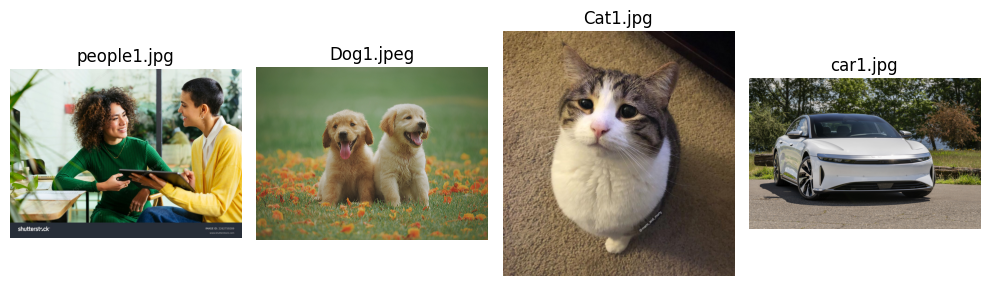

In [8]:
# Sử dụng hàm plot_images để vẽ ảnh
image_original_array = [plt.imread(image_path + source) for source in image_array]
plot_images(image_original_array, columns=4, img_names=image_array)

In [9]:
import time
import cv2
from scipy.signal import convolve2d

In [10]:
# This function use for box blur, gaussian, edge detection filter
def conv2d(image, kernel, epoch=1, epochs=1):
  print(f"Epoch {epoch}/{epochs}", end=" ")
  print("[", end="", flush=True)

  start_time = time.time()

  # Iterate over each channel and convolve with the kernel
  m, n = kernel.shape
  y, x, z = image.shape
  y = y - m + 1
  x = x - n + 1
  new_image = np.zeros((y, x, z), dtype=image.dtype)
  for c in range(z):
    new_image[:, :, c] = convolve2d(image[:, :, c], kernel, mode='valid')
    print("#", end="", flush=True)

  print("] - 100.00% - Total time: {:.2f}s".format(time.time() - start_time))

  return new_image

## 3. Low Pass Filter

### 3.1. Using box blur filter to blur image

In [11]:
def create_box_blur_kernel(size=3):
  # Ensure size is odd
  size = int(size)
  if size % 2 == 0:
      size += 1

  # Create the box blur kernel
  kernel = np.ones((size, size), dtype=np.float32)
  kernel /= size ** 2  # Normalize to ensure kernel sums up to 1

  return kernel

In [12]:
# Define low-pass filter kernel (blur)
size = 21 # must be odd
low_pass_kernel_box_blur = create_box_blur_kernel(size=size)
print(low_pass_kernel_box_blur*(size**2))

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1.

In [13]:
image_box_blurs = [conv2d(img,
                          low_pass_kernel_box_blur,
                          epoch = index + 1,
                          epochs = len(image_original_array))
 for index, img in enumerate(image_original_array)
]

Epoch 1/4 [###] - 100.00% - Total time: 14.48s
Epoch 2/4 [###] - 100.00% - Total time: 99.02s
Epoch 3/4 [###] - 100.00% - Total time: 5.83s
Epoch 4/4 [###] - 100.00% - Total time: 12.85s


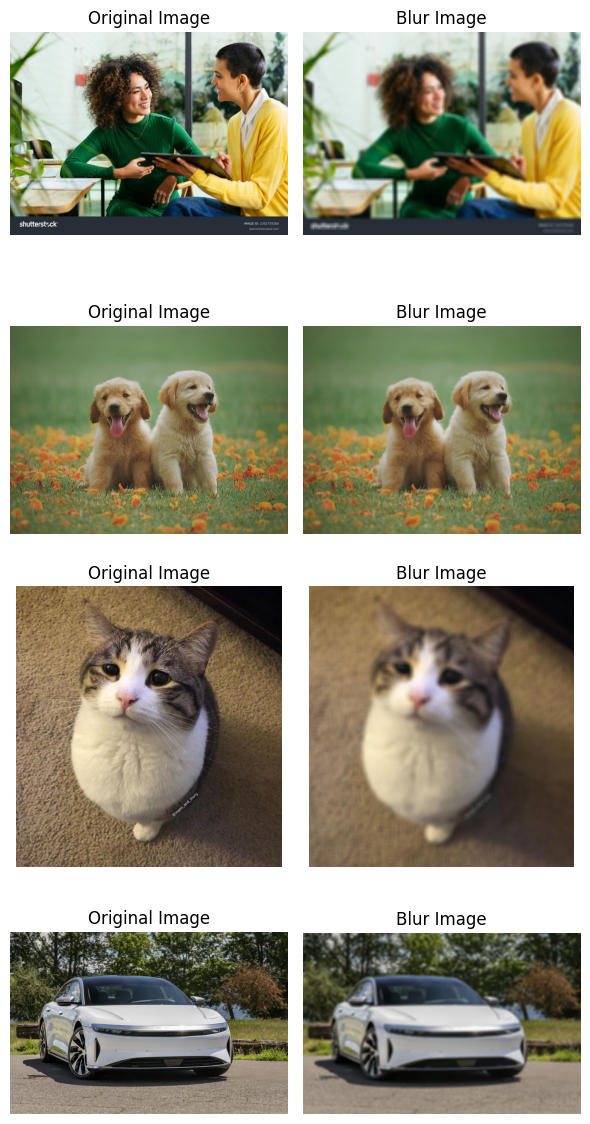

In [14]:
plot_multiple_images([image_original_array, image_box_blurs], ['Original Image', 'Blur Image'])

### 3.2. Using gaussian filter to smooth img

In [81]:
def add_gaussian_noise_rgb(image):

  mean = np.mean(image)
  std = np.std(image)
  noise = np.random.normal(mean, std, size=image.shape)
  brightness = 0.5
  noisy_image = np.clip((image + noise) * brightness, 0, 255).astype(np.uint8)

  return noisy_image

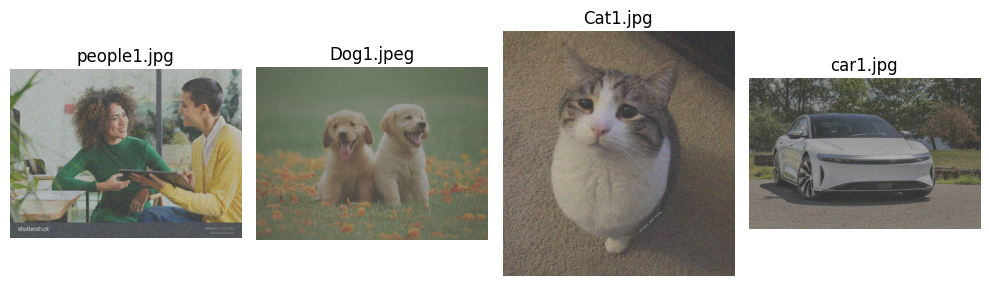

In [82]:
image_gaussian_noisy = [add_gaussian_noise_rgb(img) for img in image_original_array]
plot_images(image_gaussian_noisy, columns=4, img_names=image_array)

In [83]:
def create_gaussian_kernel(image, size=3):
    # Ensure size is odd
    size = int(size)
    if size % 2 == 0:
        size += 1

    # Convert RGB image to grayscale
    gray_image = np.mean(image, axis=2)

    # Calculate variance and sigma
    var = np.var(gray_image)
    sigma = np.sqrt(var)

    # Generate 1D Gaussian kernel
    kernel_1d = np.linspace(-(size // 2), size // 2, size)
    kernel_1d = np.exp(-(kernel_1d ** 2) / (2 * sigma ** 2))
    kernel_1d /= np.sum(kernel_1d)

    # Convert 1D kernel to 2D
    kernel_2d = np.outer(kernel_1d, kernel_1d)

    return kernel_2d

In [91]:
# Define low-pass filter kernel (smoothing)
low_pass_kernel_gaussian = [create_gaussian_kernel(img, size=21) for img in image_gaussian_noisy]
print(np.array(low_pass_kernel_gaussian).shape)

(4, 21, 21)


In [92]:
image_gaussian_denoise = [conv2d(img,
                          low_pass_kernel_gaussian[index],
                          epoch = index + 1,
                          epochs = len(image_gaussian_noisy))
 for index, img in enumerate(image_gaussian_noisy)
]

Epoch 1/4 [###] - 100.00% - Total time: 7.54s
Epoch 2/4 [###] - 100.00% - Total time: 92.63s
Epoch 3/4 [###] - 100.00% - Total time: 5.78s
Epoch 4/4 [###] - 100.00% - Total time: 12.10s


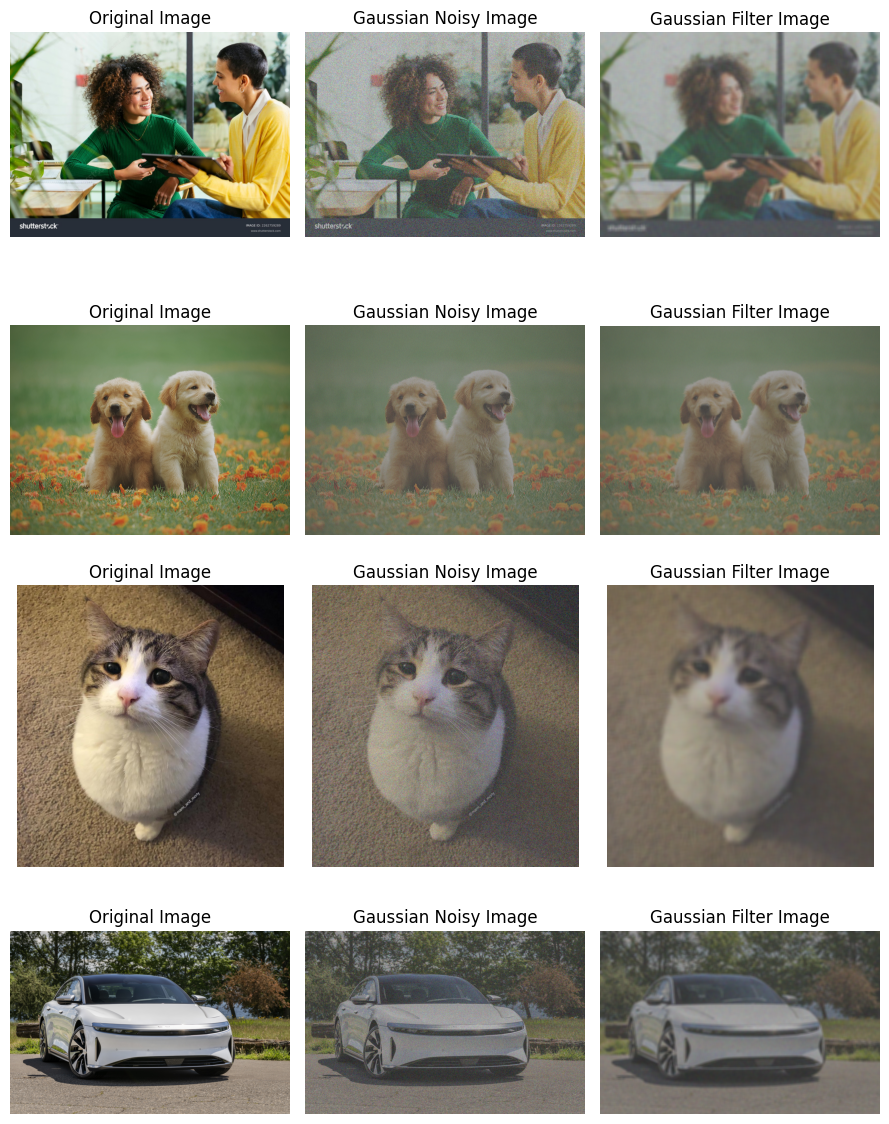

In [93]:
plot_multiple_images([image_original_array, image_gaussian_noisy, image_gaussian_denoise],
                      ['Original Image', 'Gaussian Noisy Image', 'Gaussian Filter Image'])

### 3.3. Using median filter kernel to denoise

In [125]:
def add_salt_and_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):

  noisy_image = np.copy(image)
  salt_mask = np.random.rand(*image.shape[:2]) < salt_prob
  pepper_mask = np.random.rand(*image.shape[:2]) < pepper_prob
  noisy_image[salt_mask] = 255
  noisy_image[pepper_mask] = 0

  return noisy_image

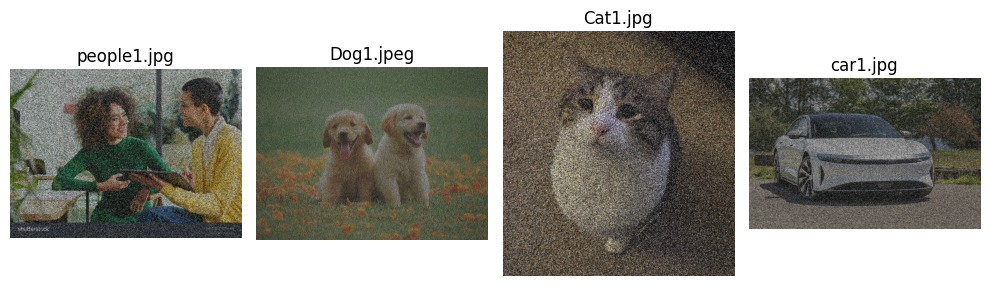

In [126]:
image_salt_pepper_noise = [add_salt_and_pepper_noise(img, salt_prob=0.2, pepper_prob=0.4) for img in image_original_array]
plot_images(image_salt_pepper_noise, columns=4, img_names=image_array)

In [127]:
from scipy.ndimage import median_filter

def median_filter_rgb(image, size=3, epoch=1, epochs=1):
  print(f"Epoch {epoch}/{epochs}", end=" ")
  print("[", end="", flush=True)

  # Separate the image into individual color channels
  r_channel = image[:, :, 0]
  g_channel = image[:, :, 1]
  b_channel = image[:, :, 2]

  start_time = time.time()

  # Apply median filter to each color channel
  r_filtered = median_filter(r_channel, size=size)
  print("#", end="", flush=True)
  g_filtered = median_filter(g_channel, size=size)
  print("#", end="", flush=True)
  b_filtered = median_filter(b_channel, size=size)
  print("#", end="", flush=True)

  # Stack the filtered channels back into an RGB image
  filtered_image = np.stack((r_filtered, g_filtered, b_filtered), axis=2)

  print("] - 100.00% - Total time: {:.2f}s".format(time.time() - start_time))

  return filtered_image

In [128]:
# Apply median filter
image_median_denoise = [median_filter_rgb(img,
                                          size=10,
                                          epoch = index + 1,
                                          epochs = len(image_salt_pepper_noise))
              for index, img in enumerate(image_salt_pepper_noise)
]

Epoch 1/1 [###] - 100.00% - Total time: 7.55s
Epoch 1/1 [###] - 100.00% - Total time: 118.16s
Epoch 1/1 [###] - 100.00% - Total time: 5.13s
Epoch 1/1 [###] - 100.00% - Total time: 13.69s


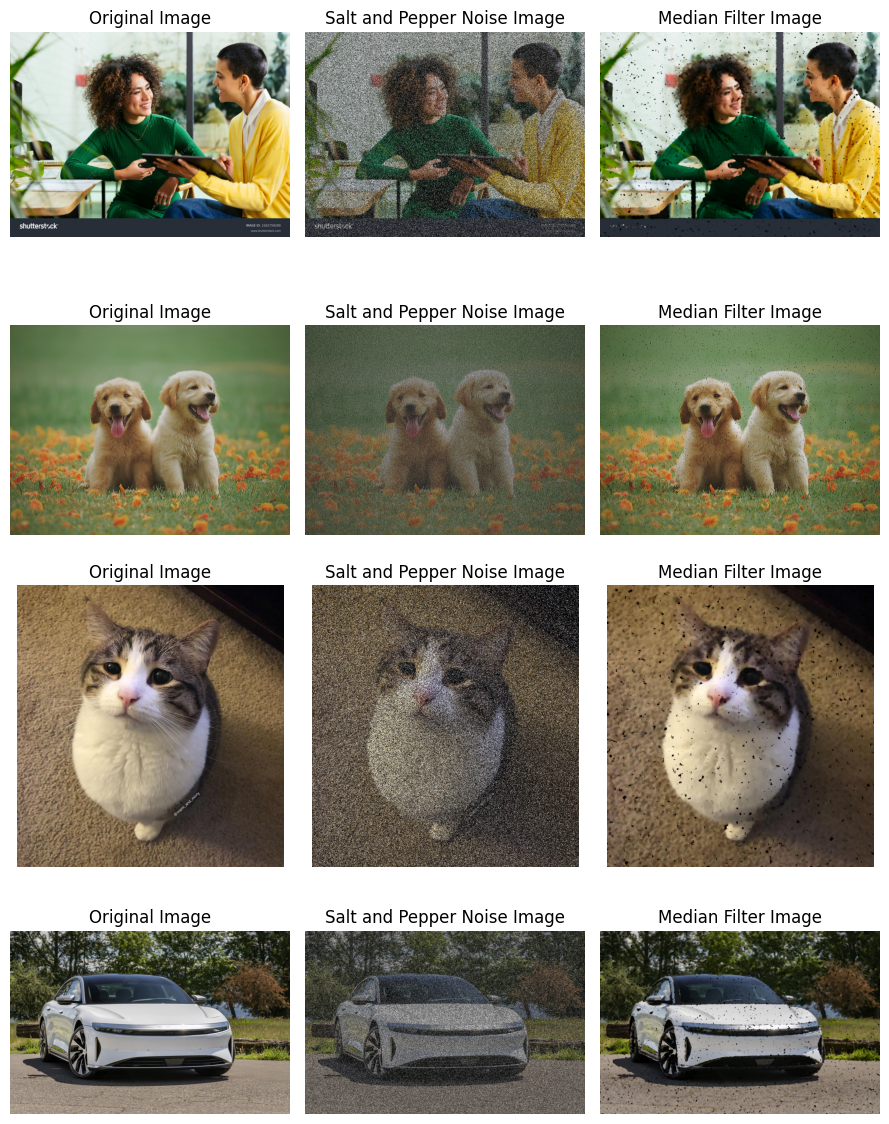

In [129]:
plot_multiple_images([image_original_array, image_salt_pepper_noise, image_median_denoise],
                     ['Original Image', 'Salt and Pepper Noise Image', 'Median Filter Image'])

## High Pass Filter

In [96]:
# Define high-pass filter kernel (edge detection)
high_pass_edge_detection_kernel = np.array([[-1, -1, -1],
                              [-1,  8, -1],
                              [-1, -1, -1]])

In [97]:
# Apply High Pass Filter
high_pass_edge_detection_images = [conv2d(img,
                              high_pass_edge_detection_kernel,
                              epoch=index + 1,
                              epochs=len(image_original_array))
                      for index, img in enumerate(image_original_array)
                   ]

Epoch 1/4 [###] - 100.00% - Total time: 0.27s
Epoch 2/4 [###] - 100.00% - Total time: 3.27s
Epoch 3/4 [###] - 100.00% - Total time: 0.17s
Epoch 4/4 [###] - 100.00% - Total time: 0.40s


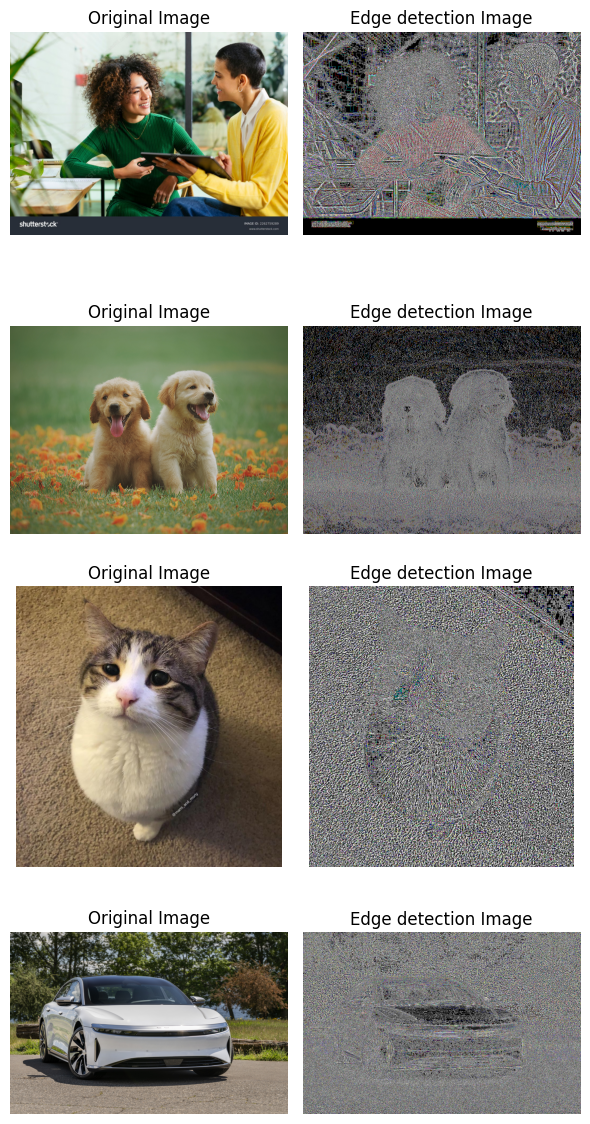

In [98]:
plot_multiple_images([image_original_array, high_pass_edge_detection_images],
                     ['Original Image', 'Edge detection Image'])